In [65]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
dict = {}
val = []
key = None

with open('robotics_hyperparameter_selection.txt', 'r') as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        line = line.strip()
        if line.startswith('Epochs') or idx == len(lines)-1:
            if key is not None:
                val = json.loads(''.join(val))
                # dict[key] = [i['val_acc'] for i in val] + [np.nan] * (150 - len(val))
                dict[key] = val
            key, val = line, []
        else:
            val.append(line)

In [ ]:
len(dict['Epochs: 50, Max LR: 0.005, Grad Clip: 0.1, Weight Decay: 0.0001, Batch Size: 256, Optimizer: Adam.'])
dict

In [123]:
# Make a dataframe with keys in the first column, and each value in the subsequent columns
df = pd.DataFrame(dict)

In [130]:
# Make three groups based on epoch number: 50, 100, 150
epochs_50 = df.filter(like='Epochs: 50')
epochs_50 = epochs_50.transpose()
epochs_50 = epochs_50.iloc[:, :50]

average_e50 = epochs_50.mean()
average_e50 = average_e50.rolling(window=2).mean()
std_e50 = epochs_50.std()
std_e50 = std_e50.rolling(window=2).mean()


epochs_100 = df.filter(like='Epochs: 100')
epochs_100 = epochs_100.transpose()
epochs_100 = epochs_100.iloc[:, :100]

average_e100 = epochs_100.mean()
average_e100 = average_e100.rolling(window=2).mean()
std_e100 = epochs_100.std()
std_e100 = std_e100.rolling(window=2).mean()


epochs_150 = df.filter(like='Epochs: 150')
epochs_150 = epochs_150.transpose()
epochs_150 = epochs_150.iloc[:, :150]

average_e150 = epochs_150.mean()
average_e150 = average_e150.rolling(window=2).mean()
std_e150 = epochs_150.std()
std_e150 = std_e150.rolling(window=2).mean()


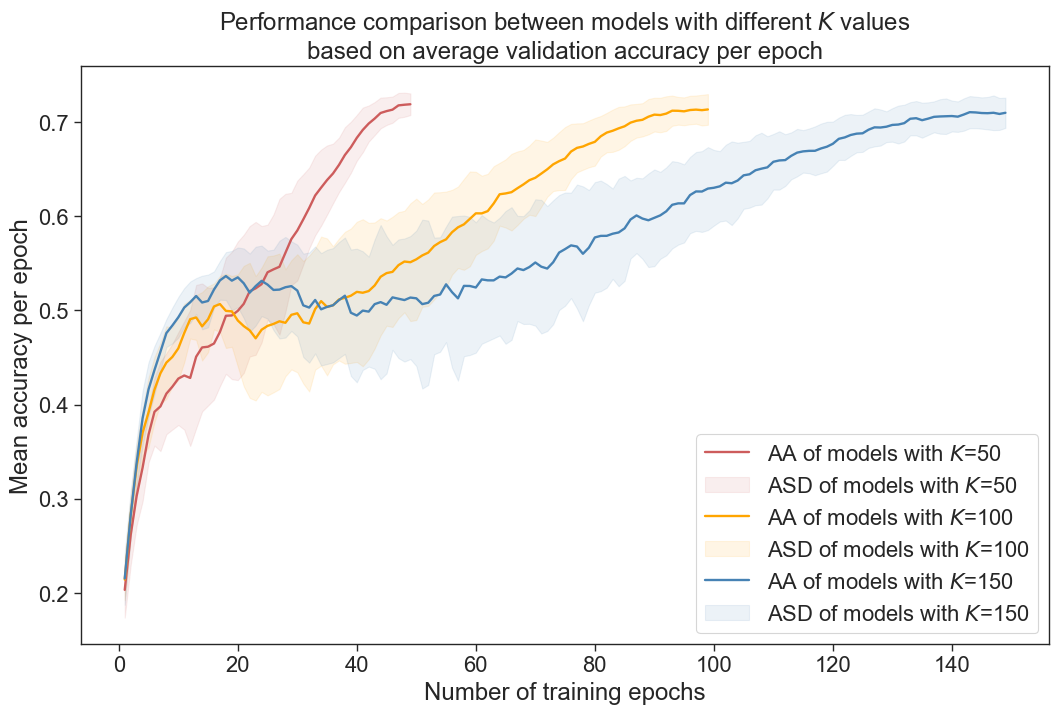

In [131]:
# Set plot size
sns.set(style='ticks', context='paper', palette='Set1', font_scale=1.8, rc={"lines.linewidth": 1.7})

plt.figure(figsize=(12.5, 7.5))
plt.title('Performance comparison between models with different $K$ values\nbased on average validation accuracy per epoch')

# Plot
plt.plot(average_e50, color='indianred', label=f'AA of models with $K$=50')
plt.fill_between(average_e50.index, average_e50 - std_e50, average_e50 + std_e50, color='indianred', alpha=0.1, label=f"ASD of models with $K$=50")

plt.plot(average_e100, color='orange', label=f'AA of models with $K$=100')
plt.fill_between(average_e100.index, average_e100 - std_e100, average_e100 + std_e100, color='orange', alpha=0.1, label=f"ASD of models with $K$=100")

plt.plot(average_e150, color='steelblue', label=f'AA of models with $K$=150')
plt.fill_between(average_e150.index, average_e150 - std_e150, average_e150 + std_e150, color='steelblue', alpha=0.1, label=f"ASD of models with $K$=150")

# Params
plt.xlabel('Number of training epochs')
plt.ylabel('Mean accuracy per epoch')

# Set the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [134]:
df = df.filter(like='Epochs: 50')
df = df.iloc[:50, :]

In [135]:
# Make three groups based on epoch number: 50, 100, 150
bs_256 = df.filter(like='Batch Size: 256')
bs_256 = bs_256.transpose()

average_bs256 = bs_256.mean()
average_bs256 = average_bs256.rolling(window=2).mean()
std_bs256 = bs_256.std()
std_bs256 = std_bs256.rolling(window=2).mean()


bs_384 = df.filter(like='Batch Size: 384')
bs_384 = bs_384.transpose()

average_bs384 = bs_384.mean()
average_bs384 = average_bs384.rolling(window=2).mean()
std_bs384 = bs_384.std()
std_bs384 = std_bs384.rolling(window=2).mean()


bs_512 = df.filter(like='Batch Size: 512')
bs_512 = bs_512.transpose()

average_bs512 = bs_512.mean()
average_bs512 = average_bs512.rolling(window=2).mean()
std_bs512 = bs_512.std()
std_bs512 = std_bs512.rolling(window=2).mean()


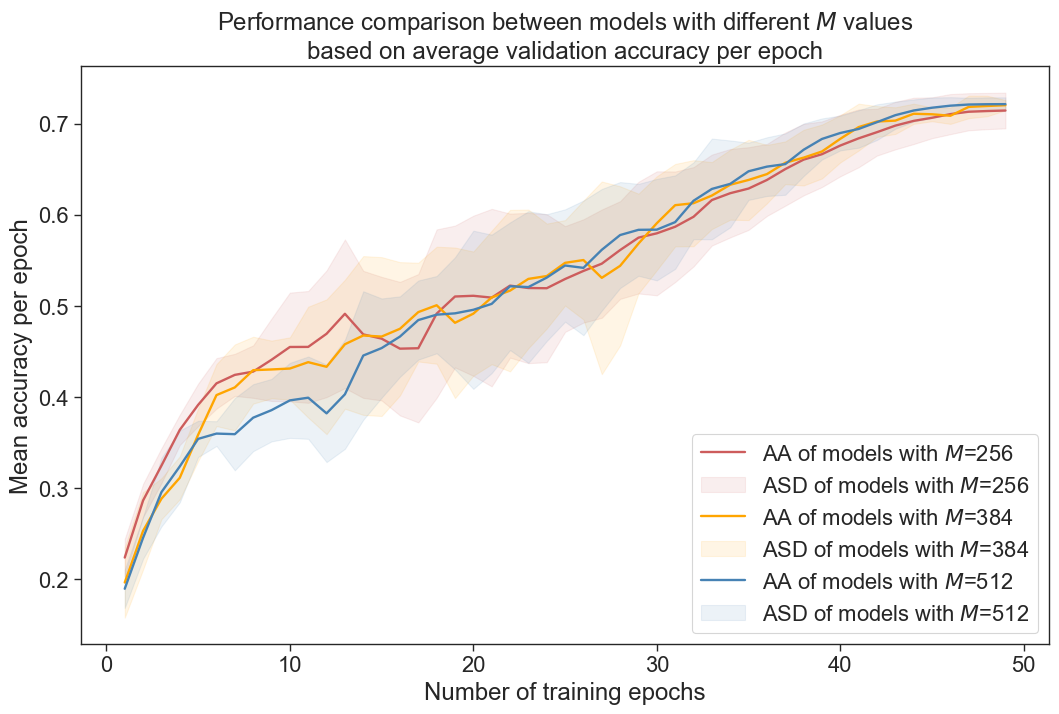

In [136]:
# Set plot size
sns.set(style='ticks', context='paper', palette='Set1', font_scale=1.8, rc={"lines.linewidth": 1.7})

plt.figure(figsize=(12.5, 7.5))
plt.title('Performance comparison between models with different $M$ values\nbased on average validation accuracy per epoch')

# Plot
plt.plot(average_bs256, color='indianred', label=f'AA of models with $M$=256')
plt.fill_between(average_bs256.index, average_bs256 - std_bs256, average_bs256 + std_bs256, color='indianred', alpha=0.1, label=f"ASD of models with $M$=256")

plt.plot(average_bs384, color='orange', label=f'AA of models with $M$=384')
plt.fill_between(average_bs384.index, average_bs384 - std_bs384, average_bs384 + std_bs384, color='orange', alpha=0.1, label=f"ASD of models with $M$=384")

plt.plot(average_bs512, color='steelblue', label=f'AA of models with $M$=512')
plt.fill_between(average_bs512.index, average_bs512 - std_bs512, average_bs512 + std_bs512, color='steelblue', alpha=0.1, label=f"ASD of models with $M$=512")

# Params
plt.xlabel('Number of training epochs')
plt.ylabel('Mean accuracy per epoch')

# Set the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [137]:
# Make three groups based on epoch number: 50, 100, 150
lr_05 = df.filter(like='Max LR: 0.005')
lr_05 = lr_05.transpose()

average_lr05 = lr_05.mean()
average_lr05 = average_lr05.rolling(window=2).mean()
std_lr05 = lr_05.std()
std_lr05 = std_lr05.rolling(window=2).mean()


lr_1 = df.filter(like='Max LR: 0.01')
lr_1 = lr_1.transpose()

average_lr1 = lr_1.mean()
average_lr1 = average_lr1.rolling(window=2).mean()
std_lr1 = lr_1.std()
std_lr1 = std_lr1.rolling(window=2).mean()


lr_2 = df.filter(like='Max LR: 0.02')
lr_2 = lr_2.transpose()

average_lr2 = lr_2.mean()
average_lr2 = average_lr2.rolling(window=2).mean()
std_lr2 = lr_2.std()
std_lr2 = std_lr2.rolling(window=2).mean()


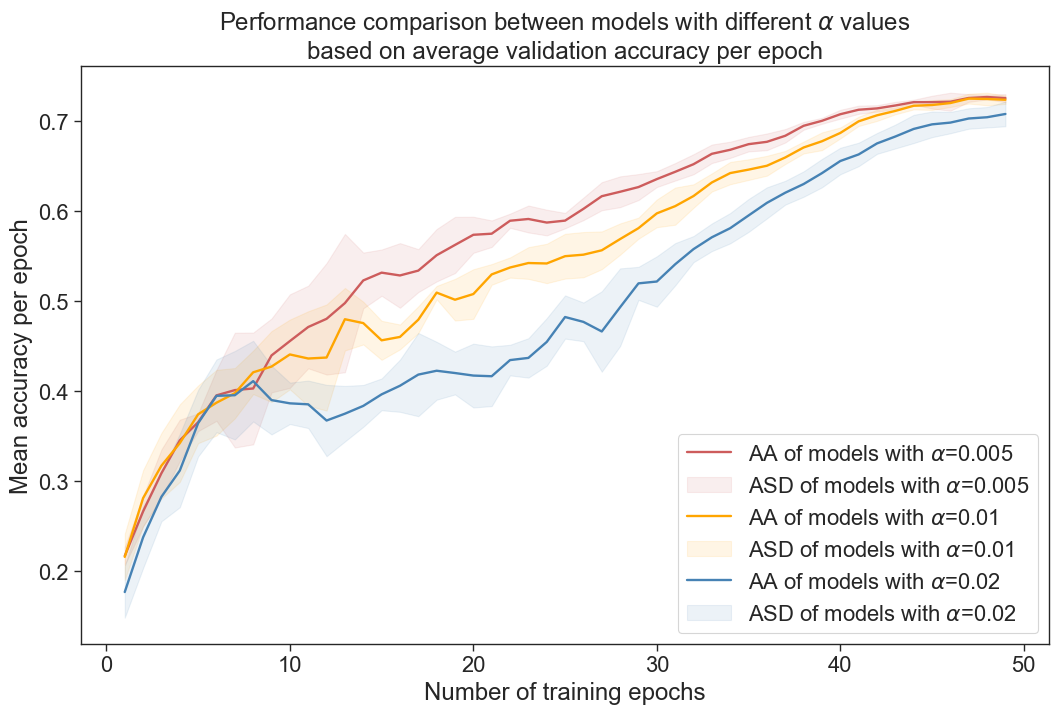

In [138]:
# Set plot size
sns.set(style='ticks', context='paper', palette='Set1', font_scale=1.8, rc={"lines.linewidth": 1.7})

plt.figure(figsize=(12.5, 7.5))
plt.title('Performance comparison between models with different $\\alpha$ values\nbased on average validation accuracy per epoch')

# Plot
plt.plot(average_lr05, color='indianred', label=f'AA of models with $\\alpha$=0.005')
plt.fill_between(average_lr05.index, average_lr05 - std_lr05, average_lr05 + std_lr05, color='indianred', alpha=0.1, label=f"ASD of models with $\\alpha$=0.005")

plt.plot(average_lr1, color='orange', label=f'AA of models with $\\alpha$=0.01')
plt.fill_between(average_lr1.index, average_lr1 - std_lr1, average_lr1 + std_lr1, color='orange', alpha=0.1, label=f"ASD of models with $\\alpha$=0.01")

plt.plot(average_lr2, color='steelblue', label=f'AA of models with $\\alpha$=0.02')
plt.fill_between(average_lr2.index, average_lr2 - std_lr2, average_lr2 + std_lr2, color='steelblue', alpha=0.1, label=f"ASD of models with $\\alpha$=0.02")

# Params
plt.xlabel('Number of training epochs')
plt.ylabel('Mean accuracy per epoch')

# Set the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()